# Spike Sandbox

The following Colaboratory notebook enables rapid proto-typing of C++ code for the Spike simulator. For an introduction to Spike, click [here](https://sites.google.com/view/spike-simulator/home)

To get started, you can simply run every cell up until the section entitled 'Sandbox'

After that, you will be able to edit, compile, and run C++ code for Spike simulations, using only the commands under Sandbox.

Everytime you want to make a further change to the Sandbox.cpp source code, begin at the top of the Sandbox section.

If you run into an issue and want to start from a clean installation, select 'Restart runtime...' under the 'Runtime' option. Then, begin at the top of this notebook under 'Setting up environment'.

*This Colaboratory notebook was created by members of the [Oxford Foundation for Theoretical Neuroscience and Artificial Intelligence](https://www.oftnai.org/). *

#Setup

## Setting up environment

The following lines of code are useful if you want to do a clean re-installation of Spike and its dependencies. If you are running this Colab document for the first time, you can skip to the !git clone cell, but running these commands will not cause any issues.

In [0]:
cd /content

/content


In [0]:
rm -rf PolyNetwork_CppTools #Run if Spike folder is present

In [0]:
ls

sample_data/


In [0]:
!git clone --recursive https://github.com/nielsleadholm/PolyNetwork_CppTools #Note '!' is necessary in Colab to run shell commands

Cloning into 'PolyNetwork_CppTools'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 40 (delta 13), reused 36 (delta 9), pack-reused 0
Unpacking objects: 100% (40/40), done.
Submodule 'Spike' (https://github.com/nasiryahm/Spike) registered for path 'Spike'
Cloning into '/content/PolyNetwork_CppTools/Spike'...
remote: Enumerating objects: 208, done.        
remote: Counting objects: 100% (208/208), done.        
remote: Compressing objects: 100% (115/115), done.        
remote: Total 12831 (delta 154), reused 136 (delta 93), pack-reused 12623        
Receiving objects: 100% (12831/12831), 44.56 MiB | 35.67 MiB/s, done.
Resolving deltas: 100% (9961/9961), done.
Submodule path 'Spike': checked out 'a46393570eef6f69cde7b9ae77887897889a39b9'


In [0]:
cd /content/PolyNetwork_CppTools

/content/PolyNetwork_CppTools


In [0]:
!git pull 
!git checkout master 

Already up to date.
Already on 'master'
Your branch is up to date with 'origin/master'.


## Testing NVCC & CMake Setup

In [0]:
cd /content/PolyNetwork_CppTools/Build

/content/PolyNetwork_CppTools/Build


In [0]:
!/usr/local/cuda/bin/nvcc #'fatal' message is expected, as no input files given; note that 'NVCC' is NVIDA's compiling tool for CUDA

nvcc fatal   : No input files specified; use option --help for more information


In [0]:
!rm -rf * #rm = remove; r = remove directory and its contents recursively; f = force (do so wihtout prompts)

In [0]:
cd /content/PolyNetwork_CppTools

/content/PolyNetwork_CppTools


In [0]:
!cmake ./

-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification is GNU 7.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Looking for pthread_create in pthread - found
-- Found Threads: TRUE  
-- Found CUDA: /usr/local/cuda (found version "10.0") 
-- Configu

In [0]:
!rm /usr/local/cuda/bin/gcc;
!rm /usr/local/cuda/bin/g++;
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc; #ln -s creates a symbolic link, essentially such that if something is queried at a location (which now no longer exists), the link points to a new location
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++;

rm: cannot remove '/usr/local/cuda/bin/gcc': No such file or directory
rm: cannot remove '/usr/local/cuda/bin/g++': No such file or directory


In [0]:
!make -j8 #j8 specifies that 8 jobs should be simultaneously execuded by the makefile

Scanning dependencies of target SpikeCUDA
Scanning dependencies of target SpikeDummy
[  1%] Building /content/PolyNetwork_CppTools/Spike/Spike/Backend/CUDA/ActivityMonitor/SpikingActivityMonitor.cu
[  2%] Building /content/PolyNetwork_CppTools/Spike/Spike/Backend/CUDA/ActivityMonitor/RateActivityMonitor.cu
Building NVCC Device object /content/PolyNetwork_CppTools/Spike/Spike/Backend/CUDA/ActivityMonitor/SpikingActivityMonitor.cu
[  3%] Building /content/PolyNetwork_CppTools/Spike/Spike/Backend/CUDA/ActivityMonitor/ActivityMonitor.cu
[  4%] Building /content/PolyNetwork_CppTools/Spike/Spike/Backend/CUDA/CUDABackend.cu
[  7%] Building /content/PolyNetwork_CppTools/Spike/Spike/Backend/CUDA/Synapses/VoltageSpikingSynapses.cu
[  7%] Building /content/PolyNetwork_CppTools/Spike/Spike/Backend/CUDA/Helpers/RandomStateManager.cu
[  8%] Building /content/PolyNetwork_CppTools/Spike/Spike/Backend/CUDA/Helpers/Memory.cu
Building NVCC Device object /content/PolyNetwork_CppTools/Spike/Spike/Backend/C

In [0]:
import numpy as np
import pandas as pd #Pandas has multiple functions, including providing 'data_frame' objects that can be used for visualizing and analyzing data
from matplotlib import pyplot as plt

%matplotlib inline 
# 'percentage sign' matplotlib is a 'magic function' in Colab that enables the outputs of matplotlib to the command line, including figures

## Import Stimuli & Synaptic Data

Clean up any old connectivity data files.

In [0]:
!rm *.syn

rm: cannot remove '*.syn': No such file or directory


In [0]:
ls

Build/               LeadholmBinding*     Spike/
CMakeCache.txt       LeadholmBinding.cpp  SpikeJupyter_Leadholm.ipynb
CMakeFiles/          LICENSE              UtilityFunctionsLeadholm.hpp
cmake_install.cmake  Makefile
CMakeLists.txt       README.md


Automatic import method

In [0]:
# !wget https://www.dropbox.com/s/t9cdjalcf7aqt0y/Connectivity_Data.syn

Manual import method

In [0]:
from google.colab import files

uploaded = files.upload()

Saving Connectivity_Data_lat_011.syn to Connectivity_Data_lat_011.syn
Saving Connectivity_Data_lat_211.syn to Connectivity_Data_lat_211.syn
Saving Connectivity_Data_lat_210.syn to Connectivity_Data_lat_210.syn
Saving Connectivity_Data_lat_201.syn to Connectivity_Data_lat_201.syn
Saving Connectivity_Data_lat_200.syn to Connectivity_Data_lat_200.syn
Saving Connectivity_Data_lat_111.syn to Connectivity_Data_lat_111.syn
Saving Connectivity_Data_lat_110.syn to Connectivity_Data_lat_110.syn
Saving Connectivity_Data_lat_101.syn to Connectivity_Data_lat_101.syn
Saving Connectivity_Data_lat_100.syn to Connectivity_Data_lat_100.syn
Saving Connectivity_Data_lat_010.syn to Connectivity_Data_lat_010.syn
Saving Connectivity_Data_lat_001.syn to Connectivity_Data_lat_001.syn
Saving Connectivity_Data_lat_000.syn to Connectivity_Data_lat_000.syn
Saving Connectivity_Data_ff_211.syn to Connectivity_Data_ff_211.syn
Saving Connectivity_Data_ff_210.syn to Connectivity_Data_ff_210.syn
Saving Connectivity_Data

# Network Creation and Execution

## Edit and Compile LeadholmBinding.cpp

Simulation Parameters - these must be set for use later during visualization of the results

In [0]:
training_epochs = 20000
display_epochs = 50

epoch_duration = 0.2 #seconds
num_neurons_layer = 5*5*2 #number of neurons per layer
num_mult_synapses = 4 #number of synapses per connection between neurons

Over-write the LeadholmBinding.cpp file with the desired code. All code must be inserted below the ''%%writefile Sandbox.cpp' line

In [0]:
%%writefile LeadholmBinding.cpp


#include "Spike/Spike.hpp"
#include "UtilityFunctionsLeadholm.hpp"
#include <array>
#include <iostream>
#include <cstring>
#include <string>


// Network with 5x5 neurons in each layer
// If unable to get interesting activity, then can make the most trivial case of literally two 
// parallel networks with no interactivity (as a proxy for winner-take-all connectivity)
// Inhibitory population is the same size as the excitatory population
// Start actually with Gaussian connectivity and SOMO like architecture to see if possible
// Can later use all-to-all connectivity if necessary-


// Things to add:
// Background neurons inputting to all layers to prevent dead neurons following plasticity changes
// *** need to check in the future this isn't cause some odd correlated activity by each 
// background neuron simultaneously activating neurons in multiple layers etc. ***

// The function which will autorun when the executable is created
int main (int argc, char *argv[]){

  /*
      CHOOSE THE COMPONENTS OF YOUR SIMULATION
  */

  // Create an instance of the Model
  SpikingModel* BinaryModel = new SpikingModel();
  /* Explanation of above notation:
    BinaryModel is intiliazed as a pointer to an object of class SpikingModel
    The 'new' operator is essentially the C++ equivalent of 'malloc' allocates memory for the un-named object, and returns the pointer to this object,
    or if it is an array, the first element. The memory allocation performed by new is with 'dynamic storage duration', such that the lifetime of the 
    object isn't limited to the scope in which it was created. This is also known as allocating memory to the 'heap' (as opposed to the stack)
    and as such memory *de*-allocation is critical in order to prevent a memory leak/'garbage' building up
  */

  //Simulation parameters; these can be relatively easily adjusted to observe the affect on the network
  int training_epochs = 20000; // Number of epochs to have STDP active
  int display_epochs = 50; // Number of epochs where the each stimulus is presented with STDP inactive
  float exc_inh_weight_ratio = 5.0; //parameter that determines how much stronger inhibitory synapses are than excitatory synapses
  int background_firing_rate = 500; //approximate firing rate of noisy neurons feeding into all layers, and preventing dead neurons
  
  // Initialize core model parameters
  int x_dim = 5;
  int y_dim = 5;
  int num_images = 2; 
  int input_firing_rate = 50; //approximate firing rate of input stimuli; note multiplier used later to generate actual stimuli
  float competitive_connection_prob = 0.99; // Probability parameter that controls how the two competing halves of the network are connected
  float timestep = 0.0001;  // In seconds
  float lower_weight_limit = 0.005;
  float upper_weight_limit = 0.015; //For initiliazing weights
  float max_weight_parameter = 0.03; //Maximum value that can be learned
  BinaryModel->SetTimestep(timestep);

  // Choose an input neuron type
  PatternedPoissonInputSpikingNeurons* patterned_poisson_input_neurons = new PatternedPoissonInputSpikingNeurons();
  // Choose the neuron type
  LIFSpikingNeurons* lif_spiking_neurons = new LIFSpikingNeurons();
  // Choose the synapse type
  ConductanceSpikingSynapses * conductance_spiking_synapses = new ConductanceSpikingSynapses();

  // Allocate your chosen components to the simulator
  BinaryModel->input_spiking_neurons = patterned_poisson_input_neurons;
  BinaryModel->spiking_neurons = lif_spiking_neurons;
  BinaryModel->spiking_synapses = conductance_spiking_synapses;

  // *** Allocate chosen plasticity rule
  custom_stdp_plasticity_parameters_struct * Excit_STDP_PARAMS = new custom_stdp_plasticity_parameters_struct;
  Excit_STDP_PARAMS->a_plus = 1.0f; //Set to the mean of the excitatory weight distribution
  Excit_STDP_PARAMS->a_minus = 1.0f;
  Excit_STDP_PARAMS->weight_dependence_power_ltd = 0.0f; //By setting this to 0, the STDP rule has *no* LTD weight dependence, and hence behaves like the classical Gerstner rule
  Excit_STDP_PARAMS->w_max = max_weight_parameter; //Sets the maximum weight that can be *learned* (hard border)
  Excit_STDP_PARAMS->tau_plus = 0.01f;
  Excit_STDP_PARAMS->tau_minus = 0.01f;
  Excit_STDP_PARAMS->learning_rate = 0.001f;
  Excit_STDP_PARAMS->a_star = 0; //Excit_STDP_PARAMS->a_plus * Excit_STDP_PARAMS->tau_minus * Inhib_STDP_PARAMS->targetrate;

  CustomSTDPPlasticity * excitatory_stdp = new CustomSTDPPlasticity((SpikingSynapses *) conductance_spiking_synapses, (SpikingNeurons *) lif_spiking_neurons, (SpikingNeurons *) patterned_poisson_input_neurons, (stdp_plasticity_parameters_struct *) Excit_STDP_PARAMS);  
  
  BinaryModel->AddPlasticityRule(excitatory_stdp);

  /*
      ADD ANY ACTIVITY MONITORS
  */
  SpikingActivityMonitor* spike_monitor_main = new SpikingActivityMonitor(lif_spiking_neurons);
  BinaryModel->AddActivityMonitor(spike_monitor_main);
  // Add activity monitor for poisson input neurons
  SpikingActivityMonitor* spike_monitor_input = new SpikingActivityMonitor(patterned_poisson_input_neurons);
  BinaryModel->AddActivityMonitor(spike_monitor_input);


  // SETTING UP INPUT NEURONS

  std::cout << "\n\n.......\nCreating network neuron groups...\n.......\n\n";
  
  // Creating an input neuron parameter structure
  // Initialize a 2D vector to store the neuron group IDs of each excitatory layer, including the input as the 0th layer
  // Note however this vector will not include the background activity neuron group
  std::vector<std::vector<int>> neuron_params_vec;

  // Note the first dimension corresponds to the layer, indexed from 0, corresponding to the input neurons
  // The second dimension corresponds to the 'left' or 'right' side of the network, indexed by 0 and 1 respectively

  patterned_poisson_input_spiking_neuron_parameters_struct* neuron_params_0_0 = new patterned_poisson_input_spiking_neuron_parameters_struct();
  neuron_params_0_0->group_shape[0] = x_dim;    // x-dimension of the input neuron layer
  neuron_params_0_0->group_shape[1] = y_dim;   // y-dimension of the input neuron layer
  neuron_params_vec.push_back(std::vector<int>());
  neuron_params_vec[0].push_back(BinaryModel->AddInputNeuronGroup(neuron_params_0_0));

  patterned_poisson_input_spiking_neuron_parameters_struct* neuron_params_0_1 = new patterned_poisson_input_spiking_neuron_parameters_struct();
  neuron_params_0_1->group_shape[0] = x_dim;    // x-dimension of the input neuron layer
  neuron_params_0_1->group_shape[1] = y_dim;   // y-dimension of the input neuron layer
  neuron_params_vec[0].push_back(BinaryModel->AddInputNeuronGroup(neuron_params_0_1));

  // Set-up background noise neurons; these ensure no 'dead' neurons following plasticity by guarenteeing a random input to every neuron
  patterned_poisson_input_spiking_neuron_parameters_struct* back_input_neuron_params = new patterned_poisson_input_spiking_neuron_parameters_struct();
  back_input_neuron_params->group_shape[0] = x_dim;    // x-dimension of the input neuron layer
  back_input_neuron_params->group_shape[1] = y_dim;   // y-dimension of the input neuron layer
  int back_input_layer_ID = BinaryModel->AddInputNeuronGroup(back_input_neuron_params);

  int total_number_of_input_neurons = (neuron_params_0_0->group_shape[0]*neuron_params_0_0->group_shape[1] 
    + neuron_params_0_1->group_shape[0]*neuron_params_0_1->group_shape[1] 
    + back_input_neuron_params->group_shape[0]*back_input_neuron_params->group_shape[1]);

  // SETTING UP NEURON GROUPS
  lif_spiking_neuron_parameters_struct * excitatory_population_params = new lif_spiking_neuron_parameters_struct();
  excitatory_population_params->group_shape[0] = x_dim;
  excitatory_population_params->group_shape[1] = y_dim;
  excitatory_population_params->resting_potential_v0 = -0.06f;
  excitatory_population_params->absolute_refractory_period = 0.002f;
  excitatory_population_params->threshold_for_action_potential_spike = -0.05f;
  excitatory_population_params->somatic_capacitance_Cm = 200.0*pow(10, -12);
  excitatory_population_params->somatic_leakage_conductance_g0 = 10.0*pow(10, -9);

  std::cout << "New layer ID is " << neuron_params_vec[0][0] << "\n";
  std::cout << "New layer ID is " << neuron_params_vec[0][1] << "\n";

  // Iteratively create all the additional layers of excitatory neurons, storing their IDs in a 2D vector-of-a-vector
  // Note the input neurons are the 0th layer, specified earlier
  for (int ii = 1; ii < 4; ii++){
    // As neuron_params_vec is a vector-of-a-vector without a defined size, need to add an element to the base vector
    neuron_params_vec.push_back(std::vector<int>());
    for (int jj = 0; jj < 2; jj++){ // Iterate through the left and right hand sides of each layer
      //Add an element to the inner vector, and assign the desired value
      neuron_params_vec[ii].push_back(BinaryModel->AddNeuronGroup(excitatory_population_params));
      std::cout << "New layer ID is " << neuron_params_vec[ii][jj] << "\n";
    }
  }


  // SETTING UP SYNAPSES

  std::cout << "\n\n.......\nBuilding feed-forward connectivity...\n.......\n\n";

  // FEED-FORWARD CONNECTIONS
  // Create vector-of-a-vector-of-a-vector to store the synapse structure for feed-forward connections
  // Note the type is actually specified as the synapses parameter structure during the vector initialization
  // The first dimension corresponds to the layer, the second to the source layer side (left or right), and the receiving layer side (left or right)
  std::vector<std::vector<std::vector<conductance_spiking_synapse_parameters_struct*>>> ff_synapse_params_vec;

  //Create the feed-forward synapses for from the input neurons to the first layer, for the left hand side source, with left hand projections
  ff_synapse_params_vec.push_back(std::vector<std::vector<conductance_spiking_synapse_parameters_struct*>>());
  ff_synapse_params_vec[0].push_back(std::vector<conductance_spiking_synapse_parameters_struct*>());
  ff_synapse_params_vec[0][0].push_back(new conductance_spiking_synapse_parameters_struct());
  ff_synapse_params_vec[0][0][0]->weight_scaling_constant = excitatory_population_params->somatic_leakage_conductance_g0;
  ff_synapse_params_vec[0][0][0]->delay_range[0] = 10.0*timestep;
  ff_synapse_params_vec[0][0][0]->delay_range[1] = 10.0*timestep; //NB that as the delays will be set later from loaded files, these values are arbitrary, albeit required by Spike
  ff_synapse_params_vec[0][0][0]->decay_term_tau_g = 0.0017f;  // Seconds (Conductance Parameter)
  ff_synapse_params_vec[0][0][0]->reversal_potential_Vhat = 0.0*pow(10.0, -3);
  ff_synapse_params_vec[0][0][0]->connectivity_type = CONNECTIVITY_TYPE_PAIRWISE;
  ff_synapse_params_vec[0][0][0]->plasticity_vec.push_back(excitatory_stdp);


  // Create the right hand projections of the above
  ff_synapse_params_vec[0][0].push_back(new conductance_spiking_synapse_parameters_struct());
  std::memcpy(ff_synapse_params_vec[0][0][1], ff_synapse_params_vec[0][0][0], sizeof(* ff_synapse_params_vec[0][0][0]));

  //Create the above two equivalents, but for the right hand side of the source
  ff_synapse_params_vec[0].push_back(std::vector<conductance_spiking_synapse_parameters_struct*>());
  ff_synapse_params_vec[0][1].push_back(new conductance_spiking_synapse_parameters_struct());
  std::memcpy(ff_synapse_params_vec[0][1][0], ff_synapse_params_vec[0][0][0], sizeof(* ff_synapse_params_vec[0][0][0])); //Left hand projections
  ff_synapse_params_vec[0][1].push_back(new conductance_spiking_synapse_parameters_struct());
  std::memcpy(ff_synapse_params_vec[0][1][1], ff_synapse_params_vec[0][0][0], sizeof(* ff_synapse_params_vec[0][0][0])); //Right hand projections

  // Iteratively allocate the additional feed-forward synapses
  for (int ii = 1; ii < 3; ii++){ //Note the first element (input layer) has already been asigned above
    ff_synapse_params_vec.push_back(std::vector<std::vector<conductance_spiking_synapse_parameters_struct*>>()); //Add element for next layer
    for (int jj = 0; jj < 2; jj++){ // Iterate through the left and right hand sides of each layer sending the connections
      ff_synapse_params_vec[ii].push_back(std::vector<conductance_spiking_synapse_parameters_struct*>());
      for (int kk = 0; kk < 2; kk++){ // Iterate through the left and right hand sides of each layer receiving the connections
        ff_synapse_params_vec[ii][jj].push_back(new conductance_spiking_synapse_parameters_struct());
        std::memcpy(ff_synapse_params_vec[ii][jj][kk], ff_synapse_params_vec[0][0][0], sizeof(* ff_synapse_params_vec[0][0][0])); //Note all the ff synapses share the same base properties
      }
    }
  }

  // Iteratively load connectivity data; note this loop has to be run separately as higher layers are called, which would otherwise not yet have been defined
  for (int ii = 0; ii < 3; ii++){ // Iterate through the layers
    for (int jj = 0; jj < 2; jj++){ // Iterate through the left and right hand sides of each layer sending the connections
      for (int kk = 0; kk < 2; kk++){ // Iterate through the left and right hand sides of each layer sending the connections
          //std::cout << "\n\nCurrent projecting group ID is " << neuron_params_vec[ii][jj] << ", sending to group ID " << neuron_params_vec[ii+1][kk] << "\n";
          //std::cout << "File being called is " << ("Connectivity_Data_ff_" + std::to_string(ii) + std::to_string(jj) + std::to_string(kk) + ".syn") << "\n";
          connect_from_python(neuron_params_vec[ii][jj],
          neuron_params_vec[ii+1][kk],
          ff_synapse_params_vec[ii][jj][kk],
          ("Connectivity_Data_ff_" + std::to_string(ii) + std::to_string(jj) + std::to_string(kk) + ".syn"),
          BinaryModel);
          //std::cout << "The number of synapses is " << ff_synapse_params_vec[ii][jj][kk]->pairwise_connect_presynaptic.size() << "\n";
      }
    }
  }

  // //Check all connectivity data has been assigned to parameter structures as expected by printing to screen
  // for (int ii = 0; ii < 4; ii++){ // Iterate through the layers
  //   for (int jj = 0; jj < 2; jj++){ // Iterate through the left and right hand sides of each layer sending the connections
  //     for (int kk = 0; kk < 2; kk++){ // Iterate through the left and right hand sides of each layer sending the connections
  //         for (int ll = 100; ll < 105; ll++){
  //           printf("Pre ID %d, post ID %d, weight %f, delay %f\n", ff_synapse_params_vec[ii][jj][kk]->pairwise_connect_presynaptic[ll],
  //             ff_synapse_params_vec[ii][jj][kk]->pairwise_connect_postsynaptic[ll],
  //             ff_synapse_params_vec[ii][jj][kk]->pairwise_connect_weight[ll],
  //             ff_synapse_params_vec[ii][jj][kk]->pairwise_connect_delay[ll]);
  //       }
  //     }
  //   }
  // }




  // LATERAL CONNECTIONS
  
  std::cout << "\n\n.......\nBuilding lateral connectivity...\n.......\n\n";

  // *** inbuilt Spike method - limited to one synapse and therefore one delay per conneciton ***

  // conductance_spiking_synapse_parameters_struct * lateral_excitation_ipsilateral_parameters = new conductance_spiking_synapse_parameters_struct();
  // lateral_excitation_ipsilateral_parameters->weight_range[0] = lower_weight_limit; 
  // lateral_excitation_ipsilateral_parameters->weight_range[1] = upper_weight_limit;
  // lateral_excitation_ipsilateral_parameters->weight_scaling_constant = excitatory_population_params->somatic_leakage_conductance_g0;
  // lateral_excitation_ipsilateral_parameters->delay_range[0] = 10.0*timestep; //Delays range from 1 to 2 ms for inhibitory connectivity
  // lateral_excitation_ipsilateral_parameters->delay_range[1] = 100.0*timestep;
  // lateral_excitation_ipsilateral_parameters->decay_term_tau_g = 0.0017f;  // Seconds (Conductance Parameter)
  // lateral_excitation_ipsilateral_parameters->reversal_potential_Vhat = 0.0*pow(10.0, -3);
  // lateral_excitation_ipsilateral_parameters->connectivity_type = CONNECTIVITY_TYPE_RANDOM;
  // lateral_excitation_ipsilateral_parameters->random_connectivity_probability = competitive_connection_prob;
  // lateral_excitation_ipsilateral_parameters->plasticity_vec.push_back(excitatory_stdp);

  // conductance_spiking_synapse_parameters_struct * lateral_excitation_contralateral_parameters = new conductance_spiking_synapse_parameters_struct();
  // std::memcpy(lateral_excitation_contralateral_parameters, lateral_excitation_ipsilateral_parameters, sizeof(* lateral_excitation_ipsilateral_parameters));
  // lateral_excitation_contralateral_parameters->random_connectivity_probability = (1 - competitive_connection_prob);

  // // Iteratively create the inhibitory synapses
  // for (int ii = 0; ii < 3; ii++){ // Iterate through the layers
  //   for (int jj = 0; jj < 2; jj++){ // Iterate through the left and right hand sides of each layer sending the connections
  //     for (int kk = 0; kk < 2; kk++){ // Iterate through the left and right hand sides of each layer sending the connections
  //         if (jj==kk){
  //           BinaryModel->AddSynapseGroup(neuron_params_vec[ii+1][jj], neuron_params_vec[ii+1][kk], lateral_excitation_ipsilateral_parameters);
  //           //std::cout << "\n\nCurrent projecting group ID is " << neuron_params_vec[ii+1][jj] << ", sending to group ID " << neuron_params_vec[ii+1][kk] << ", with ipsilateral probability\n";
  //         }
  //         else{
  //           BinaryModel->AddSynapseGroup(neuron_params_vec[ii+1][jj], neuron_params_vec[ii+1][kk], lateral_excitation_contralateral_parameters);  
  //           //std::cout << "\n\nCurrent projecting group ID is " << neuron_params_vec[ii+1][jj] << ", sending to group ID " << neuron_params_vec[ii+1][kk] << ", with contralateral probability\n";
  //         }
  //     }
  //   }
  // }




  // *** connectivity file loading method: enables multiple synpases per connection ***


  // Create vector-of-a-vector-of-a-vector to store the synapse structure for lateral connections
  // The first dimension corresponds to the layer, the second to the source side (left or right), and the receiving side (left or right)
  std::vector<std::vector<std::vector<conductance_spiking_synapse_parameters_struct*>>> lat_synapse_params_vec;

  //Create the lateral synapses from the first layer, for the left hand source, with left hand projections
  lat_synapse_params_vec.push_back(std::vector<std::vector<conductance_spiking_synapse_parameters_struct*>>());
  lat_synapse_params_vec[0].push_back(std::vector<conductance_spiking_synapse_parameters_struct*>());
  lat_synapse_params_vec[0][0].push_back(new conductance_spiking_synapse_parameters_struct());
  lat_synapse_params_vec[0][0][0]->weight_scaling_constant = excitatory_population_params->somatic_leakage_conductance_g0;
  lat_synapse_params_vec[0][0][0]->delay_range[0] = 10.0*timestep;
  lat_synapse_params_vec[0][0][0]->delay_range[1] = 10.0*timestep; //NB that as the delays will be set later from loaded files, these values are arbitrary, albeit required by Spike
  lat_synapse_params_vec[0][0][0]->decay_term_tau_g = 0.0017f;  // Seconds (Conductance Parameter)
  lat_synapse_params_vec[0][0][0]->reversal_potential_Vhat = 0.0*pow(10.0, -3);
  lat_synapse_params_vec[0][0][0]->connectivity_type = CONNECTIVITY_TYPE_PAIRWISE;
  lat_synapse_params_vec[0][0][0]->plasticity_vec.push_back(excitatory_stdp);

  // Create the right hand projections of the above
  lat_synapse_params_vec[0][0].push_back(new conductance_spiking_synapse_parameters_struct());
  std::memcpy(lat_synapse_params_vec[0][0][1], lat_synapse_params_vec[0][0][0], sizeof(* lat_synapse_params_vec[0][0][0]));

  //Create the above two equivalents, but for the right hand  source
  lat_synapse_params_vec[0].push_back(std::vector<conductance_spiking_synapse_parameters_struct*>());
  lat_synapse_params_vec[0][1].push_back(new conductance_spiking_synapse_parameters_struct());
  std::memcpy(lat_synapse_params_vec[0][1][0], lat_synapse_params_vec[0][0][0], sizeof(* lat_synapse_params_vec[0][0][0])); //Left hand projections
  lat_synapse_params_vec[0][1].push_back(new conductance_spiking_synapse_parameters_struct());
  std::memcpy(lat_synapse_params_vec[0][1][1], lat_synapse_params_vec[0][0][0], sizeof(* lat_synapse_params_vec[0][0][0])); //Right hand projections

  // Iteratively allocate the additional lateral synapses
  for (int ii = 1; ii < 3; ii++){ //Note the first element (the first layer) has already been assigned above
    lat_synapse_params_vec.push_back(std::vector<std::vector<conductance_spiking_synapse_parameters_struct*>>()); //Add element for next layer
    for (int jj = 0; jj < 2; jj++){ // Iterate through the left and right hand sides of each layer sending the connections
      lat_synapse_params_vec[ii].push_back(std::vector<conductance_spiking_synapse_parameters_struct*>());
      for (int kk = 0; kk < 2; kk++){ // Iterate through the left and right hand sides of each layer receiving the connections
        lat_synapse_params_vec[ii][jj].push_back(new conductance_spiking_synapse_parameters_struct());
        //std::cout << "Additional lateral layer synapse is " << ii << jj << kk << "\n";
        std::memcpy(lat_synapse_params_vec[ii][jj][kk], lat_synapse_params_vec[0][0][0], sizeof(* lat_synapse_params_vec[0][0][0]));
      }
    }
  }

  // Iteratively load connectivity data
  for (int ii = 0; ii < 3; ii++){ // Iterate through the layers
    for (int jj = 0; jj < 2; jj++){ // Iterate through the left and right hand sides of each layer sending the connections
      for (int kk = 0; kk < 2; kk++){ // Iterate through the left and right hand sides of each layer sending the connections
          std::cout << "\n\nCurrent projecting group ID is " << neuron_params_vec[ii+1][jj] << ", sending to group ID " << neuron_params_vec[ii+1][kk] << "\n";
          std::cout << "File being called is " << ("Connectivity_Data_lat_" + std::to_string(ii) + std::to_string(jj) + std::to_string(kk) + ".syn") << "\n";
          connect_from_python(neuron_params_vec[ii+1][jj], //Note the input layer is skipped due to the addition of 1
          neuron_params_vec[ii+1][kk],
          lat_synapse_params_vec[ii][jj][kk], //lat_synapse_params_vec[ii][jj][kk], //note synapse vector is indexed with ii, not ii+1
          ("Connectivity_Data_lat_" + std::to_string(ii) + std::to_string(jj) + std::to_string(kk) + ".syn"),
          BinaryModel);
          std::cout << "The number of synapses is " << lat_synapse_params_vec[ii][jj][kk]->pairwise_connect_presynaptic.size() << "\n";
      }
    }
  }

  //Check all connectivity data has been assigned ot parameter structures as expected by printing to screen
  for (int ii = 0; ii < 3; ii++){ // Iterate through the layers
    for (int jj = 0; jj < 2; jj++){ // Iterate through the left and right hand sides of each layer sending the connections
      for (int kk = 0; kk < 2; kk++){ // Iterate through the left and right hand sides of each layer sending the connections
          for (int ll = 100; ll < 105; ll++){
            printf("Pre ID %d, post ID %d, weight %f, delay %f\n", lat_synapse_params_vec[ii][jj][kk]->pairwise_connect_presynaptic[ll],
              lat_synapse_params_vec[ii][jj][kk]->pairwise_connect_postsynaptic[ll],
              lat_synapse_params_vec[ii][jj][kk]->pairwise_connect_weight[ll],
              lat_synapse_params_vec[ii][jj][kk]->pairwise_connect_delay[ll]);
        }
      }
    }
  }

  std::cout << "\n\n.......\nBuilding inhibitory and background connectivity...\n.......\n\n";

  // INHIBITORY CONNECTIONS
  conductance_spiking_synapse_parameters_struct * non_Dale_inhibition_ipsilateral_parameters = new conductance_spiking_synapse_parameters_struct();
  non_Dale_inhibition_ipsilateral_parameters->weight_range[0] = lower_weight_limit * exc_inh_weight_ratio; 
  non_Dale_inhibition_ipsilateral_parameters->weight_range[1] = upper_weight_limit * exc_inh_weight_ratio;
  // *** NB the inhibitory weights must be positive if the reversal potential is set appropriately (e.g. negative 80mv)
  non_Dale_inhibition_ipsilateral_parameters->weight_scaling_constant = excitatory_population_params->somatic_leakage_conductance_g0;
  non_Dale_inhibition_ipsilateral_parameters->delay_range[0] = 10.0*timestep; //Delays range from 1 to 2 ms for inhibitory connectivity
  non_Dale_inhibition_ipsilateral_parameters->delay_range[1] = 10.0*timestep;
  non_Dale_inhibition_ipsilateral_parameters->decay_term_tau_g = 0.0017f;  // Seconds (Conductance Parameter)
  non_Dale_inhibition_ipsilateral_parameters->reversal_potential_Vhat = -80.0*pow(10.0, -3);
  non_Dale_inhibition_ipsilateral_parameters->connectivity_type = CONNECTIVITY_TYPE_RANDOM;
  non_Dale_inhibition_ipsilateral_parameters->random_connectivity_probability = (1 - competitive_connection_prob);

  conductance_spiking_synapse_parameters_struct * non_Dale_inhibition_contralateral_parameters = new conductance_spiking_synapse_parameters_struct();
  std::memcpy(non_Dale_inhibition_contralateral_parameters, non_Dale_inhibition_ipsilateral_parameters, sizeof(* non_Dale_inhibition_ipsilateral_parameters));
  non_Dale_inhibition_contralateral_parameters->random_connectivity_probability = competitive_connection_prob;

  // Iteratively create the inhibitory synapses
  for (int ii = 0; ii < 3; ii++){ // Iterate through the layers
    for (int jj = 0; jj < 2; jj++){ // Iterate through the left and right hand sides of each layer sending the connections
      for (int kk = 0; kk < 2; kk++){ // Iterate through the left and right hand sides of each layer sending the connections
          if (jj==kk){
            BinaryModel->AddSynapseGroup(neuron_params_vec[ii+1][jj], neuron_params_vec[ii+1][kk], non_Dale_inhibition_ipsilateral_parameters);
            //std::cout << "\n\nCurrent projecting group ID is " << neuron_params_vec[ii+1][jj] << ", sending to group ID " << neuron_params_vec[ii+1][kk] << ", with ipsilateral probability\n";
          }
          else{
            BinaryModel->AddSynapseGroup(neuron_params_vec[ii+1][jj], neuron_params_vec[ii+1][kk], non_Dale_inhibition_contralateral_parameters);  
            //std::cout << "\n\nCurrent projecting group ID is " << neuron_params_vec[ii+1][jj] << ", sending to group ID " << neuron_params_vec[ii+1][kk] << ", with contralateral probability\n";
          }
      }
    }
  }


  // BACKGROUND CONNECTIONS
  //Create synapses for the background noise input to all other neurons
  conductance_spiking_synapse_parameters_struct * back_input_to_all = new conductance_spiking_synapse_parameters_struct();
  back_input_to_all->weight_range[0] = lower_weight_limit;   // Create uniform distributions of weights between the upper and lower bound
  back_input_to_all->weight_range[1] = upper_weight_limit; //NB the weight range is simply the initialization
  back_input_to_all->weight_scaling_constant = excitatory_population_params->somatic_leakage_conductance_g0;
  back_input_to_all->delay_range[0] = 10.0*timestep;
  back_input_to_all->delay_range[1] = 100.0*timestep;
  back_input_to_all->decay_term_tau_g = 0.0017f;  // Seconds (Conductance Parameter)
  back_input_to_all->reversal_potential_Vhat = 0.0*pow(10.0, -3);
  back_input_to_all->connectivity_type = CONNECTIVITY_TYPE_ALL_TO_ALL;

  // Iteratively create the background input synapses
  for (int ii = 0; ii < 3; ii++){ // Iterate through the layers
    for (int jj = 0; jj < 2; jj++){ // Iterate through the left and right hand sides of each layer
      //Note the first (input) layers are skipped, and each side of each layer only needs to receive one connection
      BinaryModel->AddSynapseGroup(back_input_layer_ID, neuron_params_vec[ii+1][jj], back_input_to_all);
      //std::cout << "\n\nBackground input neurons are sending to group ID " << neuron_params_vec[ii+1][jj] << "\n";
    }
  }

  std::cout << "\n\n.......\nAll synapses created...\n.......\n\n";

  /*
      ADD INPUT STIMULI TO THE PATTERNED POISSON NEURONS CLASS
  */

  std::cout << "\n\n.......\nAssigning stimuli to the network...\n.......\n\n";

  //Initialize array for input firing rates; note that althought it is a 2D input in the model, this is represented in Spike as a 1D array
  int total_input_size = (x_dim * y_dim * num_images * 2);
  std::vector<float> input_rates(total_input_size, 1.0); //Initializes an array of ones

  //Set the first and last section of input_rates to values such that they will be the 'on' stimuli (note the zero's and one's are inverted later)
  for (int ii = 0; ii < (x_dim * y_dim); ++ii){
    input_rates[ii] = 0.0f;
  }
  for (int jj = (x_dim * y_dim * 3); jj < (x_dim * y_dim * 4); ++jj){
    input_rates[jj] = 0.0f;
  }

  //Uncomment the following section to test that firing rates for each stimulus have maintained their 2D structure by printing to screen
  for (int ii = 0; ii < num_images; ++ii){
    std::cout << "\n\n\n\n*** Stimulus " << (ii+1) << "***\n\n";
    //Iterate through each row
    for (int jj = 0; jj < y_dim*2; ++jj){
      //Iterate through each column in a row
      for (int kk = 0; kk < x_dim; ++kk){
        std::cout << input_rates[(2 * ii * x_dim * y_dim) + jj*y_dim + kk];
      }
      std::cout << "\n";
    }
  }
  

  //Invert firing rate values (i.e. 0's and 1's) so that stimuli are the active neurons, and multiply by baseline firing rate
  for (int ii = 0; ii < total_input_size; ++ii){
    input_rates[ii] = ((input_rates[ii] - 1.0001) * -1) * input_firing_rate; //Results in a stimuli firing rate that is 1.0001*baseline, and a background firing rate that is 0.0001*baseline
  }


  /*** Assign firing rates to stimuli ***/

  //Initialize an array of integers to hold the stimulus ID values
  int stimuli_array[num_images];
  //Initialize a temporary array for holding stimulus firing rates
  float temp_stimulus_array[total_number_of_input_neurons]; //

  //Iterate through each image/stimulus
  for (int ii = 0; ii < num_images; ++ii){
    //Iterate through each image's firing rates and assign to a temporary array
    for (int jj = 0; jj < (2*x_dim*y_dim); jj++){
      temp_stimulus_array[jj] = input_rates[(2 * ii * x_dim * y_dim) + jj];
    }

    // Add the firing rate of the background neurons that input to all others
    for (int kk = (2*x_dim*y_dim); kk < total_number_of_input_neurons; kk++){
      temp_stimulus_array[kk] = background_firing_rate;
    }
    stimuli_array[ii] = patterned_poisson_input_neurons->add_stimulus(temp_stimulus_array, total_number_of_input_neurons);
  }


  BinaryModel->finalise_model();
  float simtime = 0.2f; //This should be long enough to allow any recursive signalling to finish propagating

  std::cout << "\n\n.......\nModel finalized and ready for simulating...\n.......\n\n";

  
  //    RUN THE SIMULATION WITH TRAINING
  
  BinaryModel->spiking_synapses->save_weights_as_binary("./", "Initial_Sandbox_Network");

  // Loop through a certain number of epoch's of presentation
  for (int ii = 0; ii < training_epochs; ++ii) {
    // Within each epoch, loop through each stimulus 
    //*** Eventually this order should probably be randomized ***
    for (int jj = 0; jj < num_images; ++jj){
      BinaryModel->reset_state(); //Re-set the activity of the network, but not e.g. weights and connectivity
      patterned_poisson_input_neurons->select_stimulus(stimuli_array[jj]);
      BinaryModel->run(simtime, 1); //the second argument is a boolean determining if STDP is on or off
    }
    //Save a snapshot of the model's current weights to enable looking for convergence 
    BinaryModel->spiking_synapses->save_weights_as_binary("./", "Epoch" + std::to_string(ii) + "Sandbox_Network");

  }


  spike_monitor_main->reset_state(); //Dumps all recorded spikes
  spike_monitor_input->reset_state();
  BinaryModel->reset_time(); //Resets the internal clock to 0

  /*
      RUN THE SIMULATION AFTER TRAINING WITH FIRST STIMULUS
  */

  // Loop through a certain number of epoch's of presentation
  for (int ii = 0; ii < display_epochs; ++ii) {

    //BinaryModel->reset_state(); //Re-set the activity of the network, but not e.g. weights and connectivity
    patterned_poisson_input_neurons->select_stimulus(stimuli_array[0]);
    BinaryModel->run(simtime, 0); //the second argument is a boolean determining if STDP is on or off

  }

  spike_monitor_main->save_spikes_as_binary("./", "output_spikes_posttraining_stim1");
  spike_monitor_main->save_spikes_as_txt("./", "output_spikes_posttraining_stim1");
  
  spike_monitor_input->save_spikes_as_binary("./", "input_Poisson_stim1");


  spike_monitor_main->reset_state(); //Dumps all recorded spikes
  spike_monitor_input->reset_state();
  BinaryModel->reset_time(); //Resets the internal clock to 0
  BinaryModel->reset_state(); //Re-set the activity of the network, but not e.g. weights and connectivity

  /*
      RUN THE SIMULATION AFTER TRAINING WITH SECOND STIMULUS
  */

  // Loop through a certain number of epoch's of presentation
  for (int ii = 0; ii < display_epochs; ++ii) {

    //BinaryModel->reset_state(); //Re-set the activity of the network, but not e.g. weights and connectivity
    patterned_poisson_input_neurons->select_stimulus(stimuli_array[1]);
    BinaryModel->run(simtime, 0); 

  }

  spike_monitor_main->save_spikes_as_binary("./", "output_spikes_posttraining_stim2");
  spike_monitor_main->save_spikes_as_txt("./", "output_spikes_posttraining_stim2");

  spike_monitor_input->save_spikes_as_binary("./", "input_Poisson_stim2");
  BinaryModel->spiking_synapses->save_weights_as_binary("./", "Sandbox_Network");
  BinaryModel->spiking_synapses->save_connectivity_as_binary("./", "Sandbox_Network");


  return 0;
}

Overwriting LeadholmBinding.cpp


In [0]:
!make LeadholmBinding #Recompile the edited Sandbox.cpp file

[ 30%] Built target SpikeDummy
[ 31%] Linking SpikeCUDA
Linking CXX executable SpikeCUDA
[ 62%] Built target SpikeCUDA
[ 63%] Linking CXX shared library libSpike.so
[ 97%] Built target Spike
Scanning dependencies of target LeadholmBinding
[ 98%] Building CXX object CMakeFiles/LeadholmBinding.dir/LeadholmBinding.cpp.o
[100%] Linking CXX executable LeadholmBinding
[100%] Built target LeadholmBinding


## Run Simulation

Clean up any old output files (weights, recorded spikes etc.).

In [0]:
!rm *.bin
!rm *SpikeTimes.txt
!rm *SpikeIDs.txt
!rm *.png

Run the simulation.

In [0]:
!./LeadholmBinding



.......
Creating network neuron groups...
.......

New layer ID is -1
New layer ID is -2
New layer ID is 0
New layer ID is 1
New layer ID is 2
New layer ID is 3
New layer ID is 4
New layer ID is 5


.......
Building feed-forward connectivity...
.......

Connectivity data file opened, extracting synapse IDs, weights and delays...
Connectivity data file read.
Connectivity data file opened, extracting synapse IDs, weights and delays...
Connectivity data file read.
Connectivity data file opened, extracting synapse IDs, weights and delays...
Connectivity data file read.
Connectivity data file opened, extracting synapse IDs, weights and delays...
Connectivity data file read.
Connectivity data file opened, extracting synapse IDs, weights and delays...
Connectivity data file read.
Connectivity data file opened, extracting synapse IDs, weights and delays...
Connectivity data file read.
Connectivity data file opened, extracting synapse IDs, weights and delays...
Connectivity data file read.
Co

##Visualize Results

###Activity during Stimulus 1 presentation

In [0]:
stim1_df = pd.DataFrame(
  data = {
      "ids": np.fromfile("output_spikes_posttraining_stim1SpikeIDs.bin", dtype=np.int32),
      "times": np.fromfile("output_spikes_posttraining_stim1SpikeTimes.bin", dtype=np.float32),
  }
)

#NB Pandas will generate a 'data-frame', where each row in this case has a name (ids or times), and the 
#columns in those rows contain the values of interest

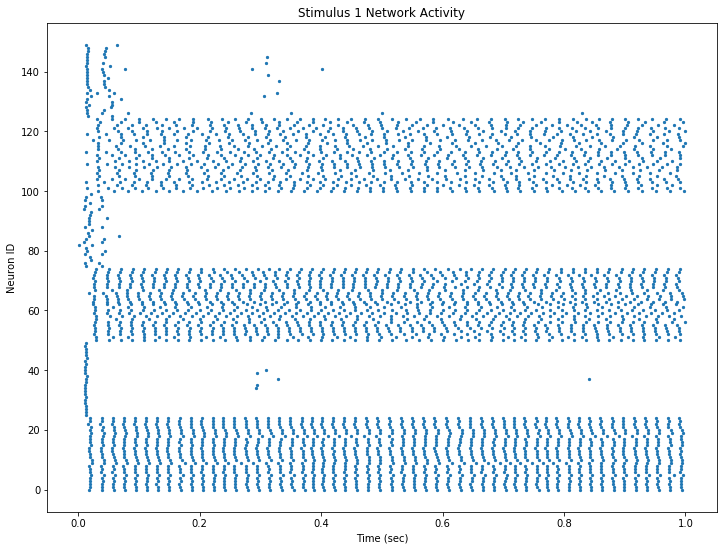

In [0]:
fig, ax = plt.subplots(facecolor='white')
fig.set_size_inches(12,9)
mask = stim1_df["times"] <1.0 #Restrict plotted spikes to a particular time period
#mask = ((stim1_df["ids"] > 0) & (stim1_df["ids"] <= 1024)) #Restrict plotted spikes to a particular layer
ax.scatter(stim1_df["times"][mask], stim1_df["ids"][mask], s=5)
plt.ylabel('Neuron ID')
plt.xlabel('Time (sec)')
plt.title('Stimulus 1 Network Activity')
plt.savefig('Stimulus 1 Network Activity.png')


###Activity during Stimulus 2 presentation

In [0]:
stim2_df = pd.DataFrame(
  data = {
      "ids": np.fromfile("output_spikes_posttraining_stim2SpikeIDs.bin", dtype=np.int32),
      "times": np.fromfile("output_spikes_posttraining_stim2SpikeTimes.bin", dtype=np.float32),
  }
)

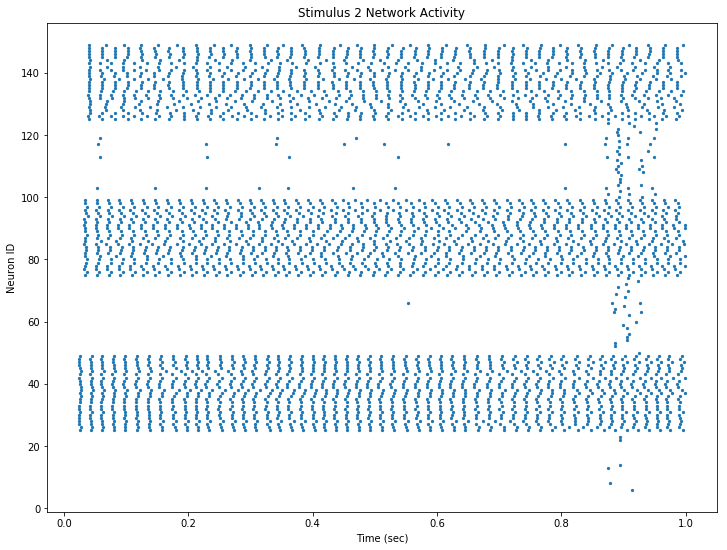

In [0]:
fig, ax = plt.subplots(facecolor='white')
fig.set_size_inches(12,9)
mask = stim2_df["times"] <1.0
#mask = ((stim2_df["ids"] > 2048) & (stim2_df["ids"] <= 2048+1024))
ax.scatter(stim2_df["times"][mask], stim2_df["ids"][mask], s=5)
plt.ylabel('Neuron ID')
plt.xlabel('Time (sec)')
plt.title('Stimulus 2 Network Activity')
plt.savefig('Stimulus 2 Network Activity.png')


###Firing Rate Distributions

In [0]:
num_network_neurons = (5*5*2*3)
network_FR_stim1 = np.bincount(stim1_df["ids"].values, minlength=num_network_neurons)/(display_epochs*epoch_duration) #minlength is the minimum number of bins for the output array
network_FR_stim2 = np.bincount(stim2_df["ids"].values, minlength=num_network_neurons)/(display_epochs*epoch_duration)

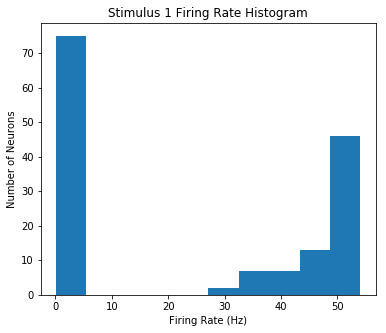

In [0]:
fig, ax = plt.subplots(facecolor='white')
fig.set_size_inches(6,5)
ax.hist(network_FR_stim1)
plt.ylabel('Number of Neurons')
plt.xlabel('Firing Rate (Hz)')
plt.title('Stimulus 1 Firing Rate Histogram')
plt.savefig('Stimulus 1 Firing Rate Histogram.png')


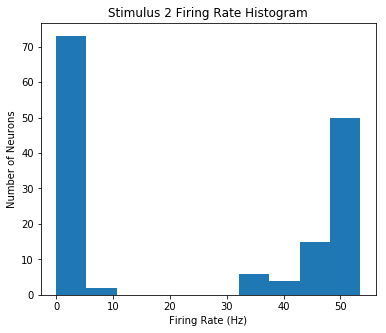

In [0]:
fig, ax = plt.subplots(facecolor='white')
fig.set_size_inches(6,5)
ax.hist(network_FR_stim2)
plt.ylabel('Number of Neurons')
plt.xlabel('Firing Rate (Hz)')
plt.title('Stimulus 2 Firing Rate Histogram')
plt.savefig('Stimulus 2 Firing Rate Histogram.png')

###Firing Rate Difference For the Two Stimuli

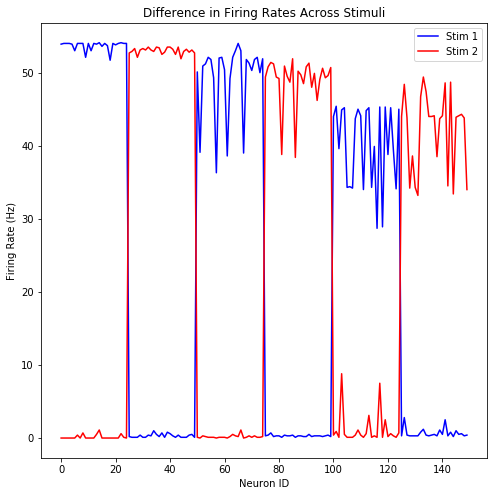

In [0]:
fig, ax = plt.subplots(facecolor='white')
fig.set_size_inches(8,8)
ax.plot(network_FR_stim1, color='b', label='Stim 1')
ax.plot(network_FR_stim2, color='r', label='Stim 2')
ax.legend()
plt.ylabel('Firing Rate (Hz)')
plt.xlabel('Neuron ID')
plt.title('Difference in Firing Rates Across Stimuli')
plt.savefig('Difference in Firing Rates Across Stimuli.png')

###Evolution of Weights

In [0]:
#Extract weights and associated pre and post IDs from the final epoch of training
weights_df = pd.DataFrame(
  data = {
      "weights" : np.fromfile("Epoch" + str(training_epochs-1) + "Sandbox_NetworkSynapticWeights.bin", dtype=np.float32),
      "pres" : np.fromfile("Sandbox_NetworkPresynapticIDs.bin", dtype=np.int32),
      "post" : np.fromfile("Sandbox_NetworkPostsynapticIDs.bin", dtype=np.int32)
  }
)

delays_df = pd.DataFrame(
  data = {
      "delays" : np.fromfile("Sandbox_NetworkSynapticDelays.bin", dtype=np.int32),
      "pres" : np.fromfile("Sandbox_NetworkPresynapticIDs.bin", dtype=np.int32),
      "post" : np.fromfile("Sandbox_NetworkPostsynapticIDs.bin", dtype=np.int32)
  }
) #NB that delays in Spike are stored as int32, not floats

In [0]:
input_weight_evolution = []
network_weight_evolution = []

input_mask = (weights_df["pres"] < 0) &(weights_df["pres"] >= -num_neurons_layer) #Input neuron IDs are indexed negatively
network_mask = (weights_df["pres"] > 0) &(weights_df["post"] > 0) #All neurons within the main network are indexed positively


for e in range(training_epochs):
  input_weight_evolution.append(np.fromfile("Epoch" + str(e) + "Sandbox_NetworkSynapticWeights.bin", dtype=np.float32)[input_mask])
  network_weight_evolution.append(np.fromfile("Epoch" + str(e) + "Sandbox_NetworkSynapticWeights.bin", dtype=np.float32)[network_mask])


input_mean_weight_evolution = np.mean(np.asarray(input_weight_evolution), axis=1)
network_mean_weight_evolution = np.mean(np.asarray(network_weight_evolution), axis=1)

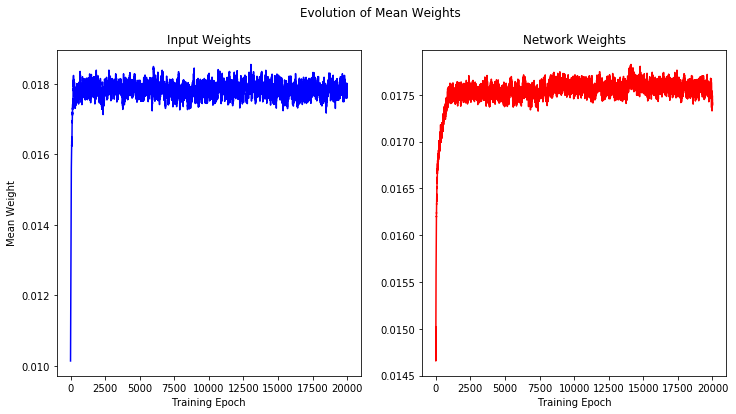

In [0]:
fig, ax = plt.subplots(facecolor='white')
fig.set_size_inches(12,6)
fig.suptitle('Evolution of Mean Weights')
plt.subplot(1,2,1)
plt.plot(input_mean_weight_evolution, color='b')
plt.ylabel('Mean Weight')
plt.xlabel('Training Epoch')
plt.title('Input Weights')

plt.subplot(1,2,2)
plt.plot(network_mean_weight_evolution, color='r')
plt.xlabel('Training Epoch')
plt.title('Network Weights')

plt.savefig('Evolution of Mean Weights.png')

###Distribution of Weights and Delays

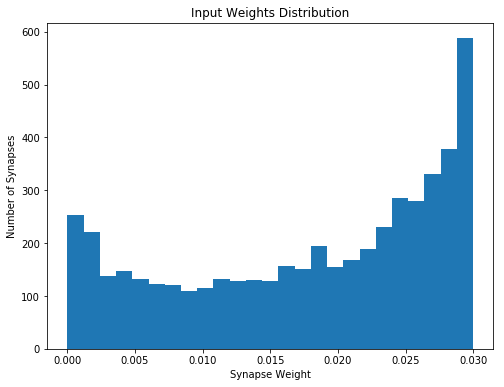

In [0]:
mask = (weights_df["pres"] < 0) & (weights_df["pres"] >= -num_neurons_layer) 

input_weights = weights_df["weights"][mask]

fig, ax = plt.subplots(facecolor='white')
fig.set_size_inches(8,6)
ax.hist(weights_df["weights"][mask], bins=25)
plt.ylabel('Number of Synapses')
plt.xlabel('Synapse Weight')
plt.title('Input Weights Distribution')
plt.savefig('Input Weights Distribution.png')

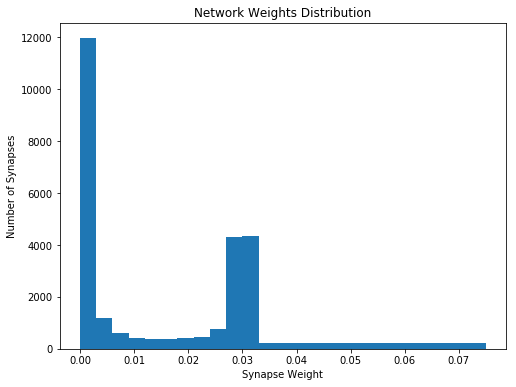

In [0]:
mask = (weights_df["pres"] > 0) &(weights_df["post"] > 0) 

network_weights = weights_df["weights"][mask]

fig, ax = plt.subplots(facecolor='white')
fig.set_size_inches(8,6)
ax.hist(weights_df["weights"][mask], bins=25)
plt.ylabel('Number of Synapses')
plt.xlabel('Synapse Weight')
plt.title('Network Weights Distribution')
plt.savefig('Network Weights Distribution.png')

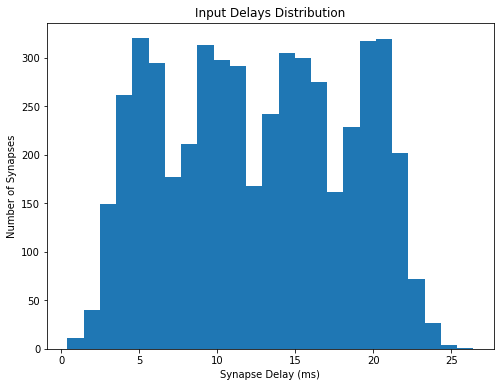

In [0]:
mask = (delays_df["pres"] < 0) & (delays_df["pres"] >= -num_neurons_layer) 

input_delays = delays_df["delays"][mask]*0.1

fig, ax = plt.subplots(facecolor='white')
fig.set_size_inches(8,6)
ax.hist(input_delays, bins=25)
plt.ylabel('Number of Synapses')
plt.xlabel('Synapse Delay (ms)')
plt.title('Input Delays Distribution')
plt.savefig('Input Delays Distribution.png')

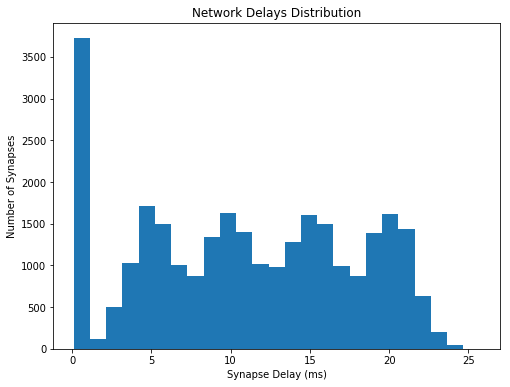

In [0]:
mask = (delays_df["pres"] > 0) & (delays_df["post"] > 0) 

network_delays = delays_df["delays"][mask]*0.1

fig, ax = plt.subplots(facecolor='white')
fig.set_size_inches(8,6)
ax.hist(network_delays, bins=25)
plt.ylabel('Number of Synapses')
plt.xlabel('Synapse Delay (ms)')
plt.title('Network Delays Distribution')
plt.savefig('Network Delays Distribution.png')

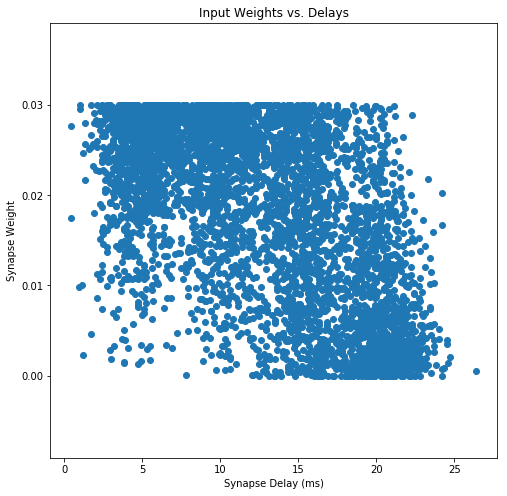

In [0]:
corrected_input_delays = input_delays

fig, ax = plt.subplots(facecolor='white')
fig.set_size_inches(8,8)
ax.scatter(corrected_input_delays, input_weights)
plt.ylabel('Synapse Weight')
plt.xlabel('Synapse Delay (ms)')
plt.title('Input Weights vs. Delays')
plt.savefig('Input Weights vs Delays.png')


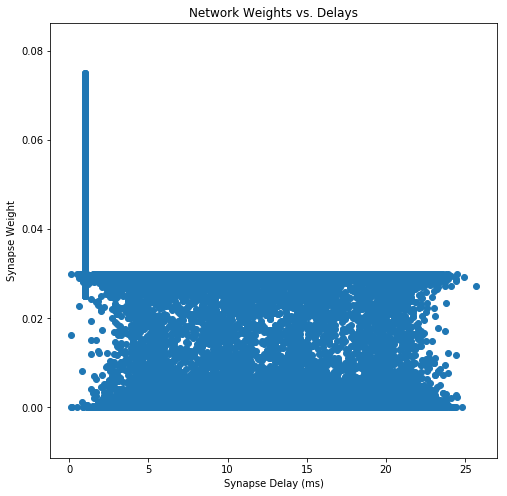

In [0]:
corrected_network_delays = network_delays

fig, ax = plt.subplots(facecolor='white')
fig.set_size_inches(8,8)
ax.scatter(corrected_network_delays, network_weights)
plt.ylabel('Synapse Weight')
plt.xlabel('Synapse Delay (ms)')
plt.title('Network Weights vs. Delays')
plt.savefig('Network Weights vs Delays.png')


In [0]:
neuron_input_vector = np.zeros((num_neurons_layer, num_neurons_layer))


for neuronid in range(num_neurons_layer):
  #For every neuron in the first layer, find the weights from input neurons that synapse onto it
  mask = (weights_df["post"].values == neuronid) & (weights_df["pres"].values < 0) & (weights_df["pres"].values >= -num_neurons_layer)
  neuron_input_vector[neuronid, weights_df["pres"].values[mask]*-1 -1] = weights_df["weights"].values[mask]

In [0]:
neuron_input_vector = np.zeros((num_neurons_layer, num_neurons_layer, num_mult_synapses))
#print(np.shape(neuron_input_vector))
mean_delays = np.zeros((1,num_mult_synapses))

for neuron_id in range(num_neurons_layer):
  #For every neuron in the first layer, find the weights from input neurons that synapse onto it; note that for every connection, there will be multiple synapses
  mask = (weights_df["post"].values == neuron_id) & (weights_df["pres"].values < 0) & (weights_df["pres"].values >= -num_neurons_layer)
  num_connections = int(len(weights_df["pres"].values[mask]*-1 -1)/num_mult_synapses) #Find the number of connections (as opposed to actual synapses) that exist
  reshape_synapse_IDs = np.reshape(weights_df["pres"].values[mask]*-1 -1, (1,num_connections,num_mult_synapses)) #Reshape the presynaptic IDs to account for the multiple synapses
  reshape_synapse_weights = np.reshape(weights_df["weights"].values[mask], (1,num_connections,num_mult_synapses))
  reshape_synapse_delays = np.reshape(delays_df["delays"].values[mask], (1,num_connections,num_mult_synapses))
  temp_mean_delays = (np.sum(reshape_synapse_delays, 1))/num_mult_synapses
  mean_delays = mean_delays + temp_mean_delays
  unique_IDs = np.unique(weights_df["pres"].values[mask]*-1 -1) #Find the unique ID for each connection (discounting repeats due to multiple synapses)
  neuron_input_vector[neuron_id, np.unique(weights_df["pres"].values[mask]*-1 -1), :] = reshape_synapse_weights #Assign the reshaped weights

mean_delays = (10**43) * mean_delays/num_neurons_layer #As the delays are given by the Spike output on the order of e-43, this is corrected for here


Input weights to each neuron in the first layer of the network

Each column represents one of the neurons in the first layer; as each neuron shares multiple synapses with each input neuron it is connected to, these are represented by the rows
The rows in descending order are associated with means delays (ms) of 
3164550000000000115589850840925672714459414528.0
6304450000000000156392625151120046843502788608.0
9397099999999999953560184997943175898327941120.0
12564849999999999767731476549520056581074452480.0


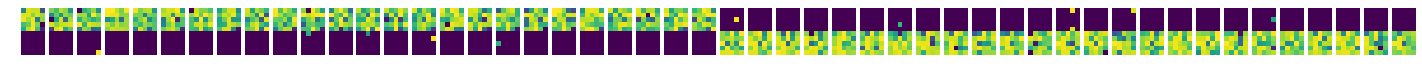

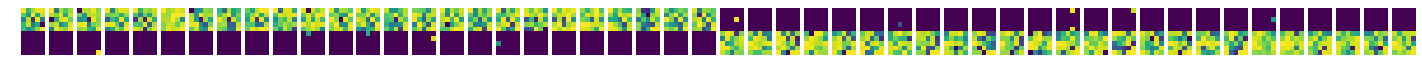

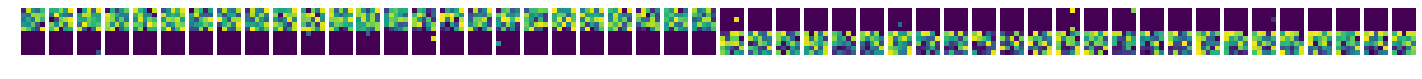

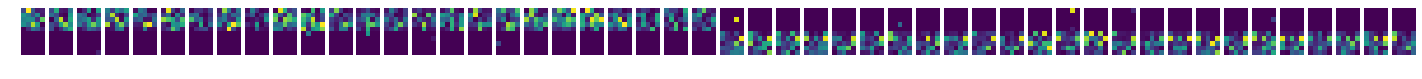

In [0]:
for synapse_id in range(num_mult_synapses):
  fig, ax = plt.subplots() 
  fig.set_size_inches(25,100)
  for neuron_id in range(num_neurons_layer):
    plt.subplot(num_neurons_layer, num_neurons_layer, 1+neuron_id) #describe the position of the new subplot, adding 1 as subplot does not index from 0
    plt.imshow(neuron_input_vector[neuron_id, :, synapse_id].reshape(5*2,5), interpolation="nearest", vmin=np.min(neuron_input_vector), vmax=np.max(neuron_input_vector))
    plt.axis('off')
  plt.savefig('Input Weights to First Layer Neurons Synapse' + str(synapse_id)+ '.png')

print("Each column represents one of the neurons in the first layer; as each neuron shares multiple synapses with each input neuron it is connected to, these are represented by the rows")
print("The rows in descending order are associated with means delays (ms) of ")
for ii in range(num_mult_synapses):
    print("%.1f" %mean_delays[0,ii])

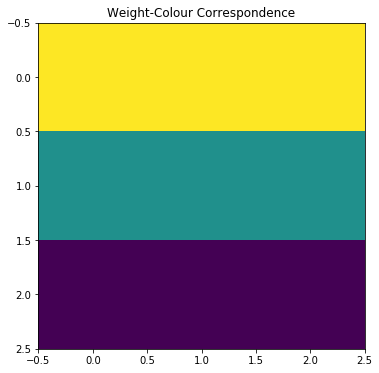

In [0]:
fig, ax =  plt.subplots(facecolor='white')
fig.set_size_inches(6,6)
max_weight = np.max(neuron_input_vector)
min_weight = np.min(neuron_input_vector)
med_weight = (max_weight - min_weight)/2 + min_weight

weight_max_square = ((max_weight, max_weight, max_weight), (med_weight, med_weight, med_weight), (min_weight, min_weight, min_weight))
plt.title('Weight-Colour Correspondence')
plt.imshow(weight_max_square)


Yellow corresponds to the maximum weight and dark purple to the lowest

## Download Data

###Download Method for Smaller Files

In [0]:
from google.colab import files
files.download('output_spikes_posttraining_stim1SpikeIDs.txt') 

In [0]:
from google.colab import files
files.download('output_spikes_posttraining_stim1SpikeTimes.txt') 

In [0]:
from google.colab import files
files.download('output_spikes_posttraining_stim2SpikeIDs.txt') 

In [0]:
from google.colab import files
files.download('output_spikes_posttraining_stim2SpikeTimes.txt') 

Zip all the files with the .png extension for easy downloading

In [0]:
!find -type f | grep -P '\.png' | tar cvzf PNG_figures.gz -T -

./Stimulus 1 Network Activity.png
./Stimulus 2 Network Activity.png
./Stimulus 1 Firing Rate Histogram.png
./Stimulus 2 Firing Rate Histogram.png
./Difference in Firing Rates Across Stimuli.png
./Input Weights Distribution.png
./Network Weights Distribution.png
./Input Delays Distribution.png
./Network Delays Distribution.png
./Input Weights vs Delays.png
./Network Weights vs Delays.png
./Input Weights to First Layer Neurons Synapse0.png
./Input Weights to First Layer Neurons Synapse1.png
./Input Weights to First Layer Neurons Synapse2.png
./Input Weights to First Layer Neurons Synapse3.png


In [0]:
from google.colab import files
files.download('PNG_figures.gz') 

###Download Method for Large Files

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
cp *.txt ../../../gdrive/My\ Drive/

##Rarely Used Functions

###Activity of Stimulus 1 Poisson input

In [0]:
# input1_df = pd.DataFrame(
#   data = {
#       "ids": np.fromfile("input_Poisson_stim1SpikeIDs.bin", dtype=np.int32),
#       "times": np.fromfile("input_Poisson_stim1SpikeTimes.bin", dtype=np.float32),
#   }
# )

In [0]:
# plt.figure(figsize=(12,9))
# mask = input1_df["times"] <4.0
# plt.scatter(input1_df["times"][mask], input1_df["ids"][mask], s=5)

###Activity of Stimulus 2 Poisson input

In [0]:
# input2_df = pd.DataFrame(
#   data = {
#       "ids": np.fromfile("input_Poisson_stim2SpikeIDs.bin", dtype=np.int32),
#       "times": np.fromfile("input_Poisson_stim2SpikeTimes.bin", dtype=np.float32),
#   }
# )

In [0]:

# plt.figure(figsize=(12,9))
# mask = input2_df["times"] <4.0
# plt.scatter(input2_df["times"][mask], input2_df["ids"][mask], s=5)